#Predicting the position of the player based on the characterstics

##EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data  = pd.read_csv('players_fifa23.csv')

In [ ]:
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   PhotoUrl           18539 non-null  object 
 7   Nationality        18539 non-null  object 
 8   Overall            18539 non-null  int64  
 9   Potential          18539 non-null  int64  
 10  Growth             18539 non-null  int64  
 11  TotalStats         18539 non-null  int64  
 12  BaseStats          18539 non-null  int64  
 13  Positions          18539 non-null  object 
 14  BestPosition       18539 non-null  object 
 15  Club               18539 non-null  object 
 16  ValueEUR           185

In [ ]:
data.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [ ]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data  = data[needed_columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   Age                18539 non-null  int64  
 3   Height             18539 non-null  int64  
 4   Weight             18539 non-null  int64  
 5   Overall            18539 non-null  int64  
 6   Potential          18539 non-null  int64  
 7   Growth             18539 non-null  int64  
 8   TotalStats         18539 non-null  int64  
 9   BaseStats          18539 non-null  int64  
 10  BestPosition       18539 non-null  object 
 11  Club               18539 non-null  object 
 12  ValueEUR           18539 non-null  int64  
 13  WageEUR            18539 non-null  int64  
 14  ReleaseClause      18539 non-null  int64  
 15  ContractUntil      18447 non-null  float64
 16  ClubJoined         185

1. Does the age of the player affect on his ball control performance?

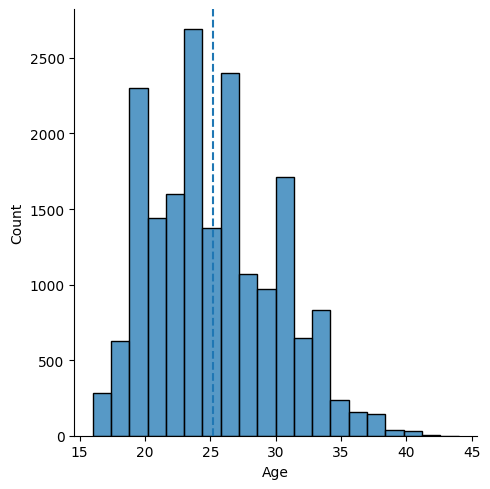

In [ ]:
sns.displot(x = data['Age'], kde = False, bins = 20)
plt.axvline(np.mean(data['Age']), ls = '--')

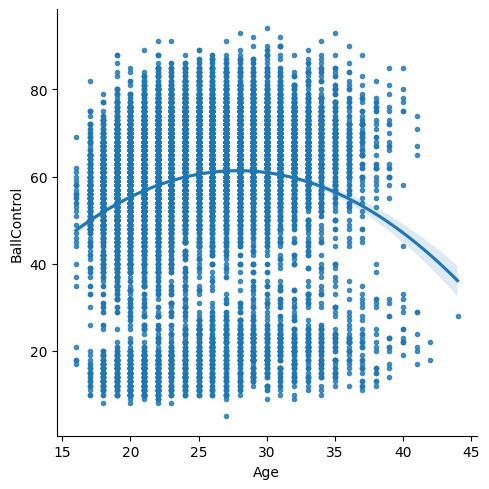

In [ ]:
sns.lmplot(x = 'Age', y = 'BallControl', data = data, markers = '.', order = 2)

2. Show how height affects different factors like stamina,dribbling, pace, passing and heading accuracy?

<Axes: xlabel='Height', ylabel='Value'>

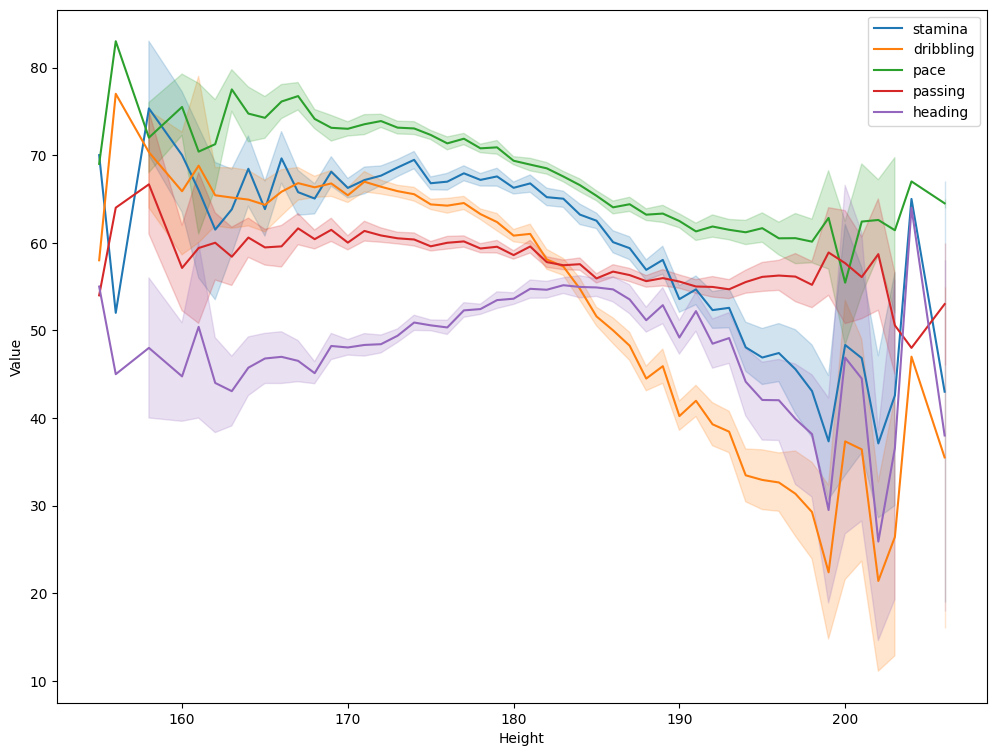

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.ylabel('Value')
sns.lineplot(x = 'Height', y = 'Stamina', data = data,legend = 'brief', label = 'stamina')
sns.lineplot(x = 'Height', y = 'Dribbling', data = data,legend = 'brief', label = 'dribbling')
sns.lineplot(x = 'Height', y = 'PaceTotal', data = data,legend = 'brief', label = 'pace')
sns.lineplot(x = 'Height', y = 'PassingTotal', data = data,legend = 'brief', label = 'passing')
sns.lineplot(x = 'Height', y = 'HeadingAccuracy', data = data,legend = 'brief', label = 'heading')


SHow if there is a relation between Wage and Overall of the players

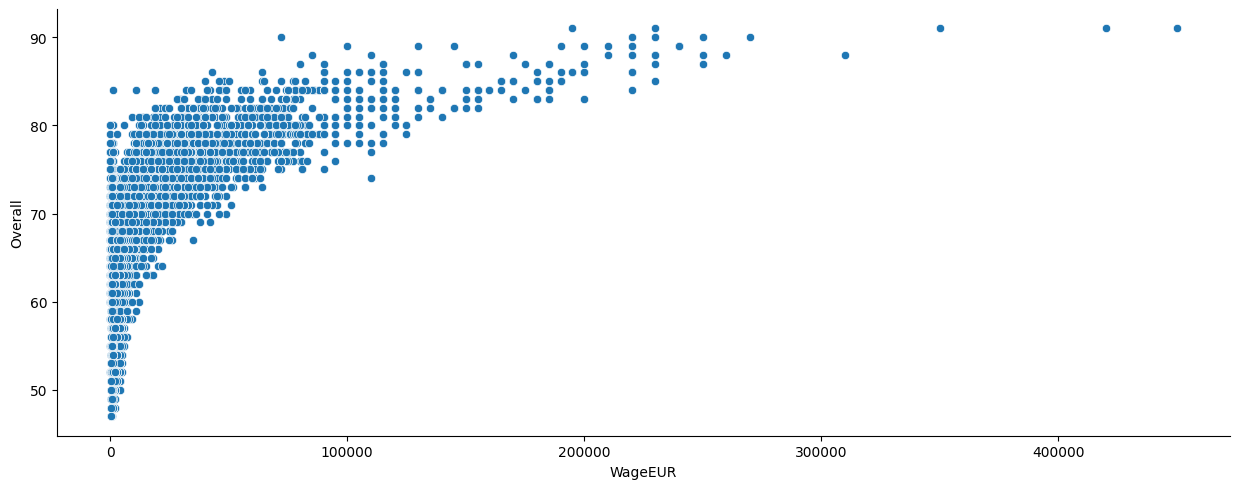

In [ ]:
sns.relplot(x = 'WageEUR', y = 'Overall', data = data, aspect = 2.5)

Show the top quickest players

In [ ]:
top_acc = data.sort_values(by = ['Acceleration'], ascending = False)

<Axes: xlabel='Name', ylabel='Acceleration'>

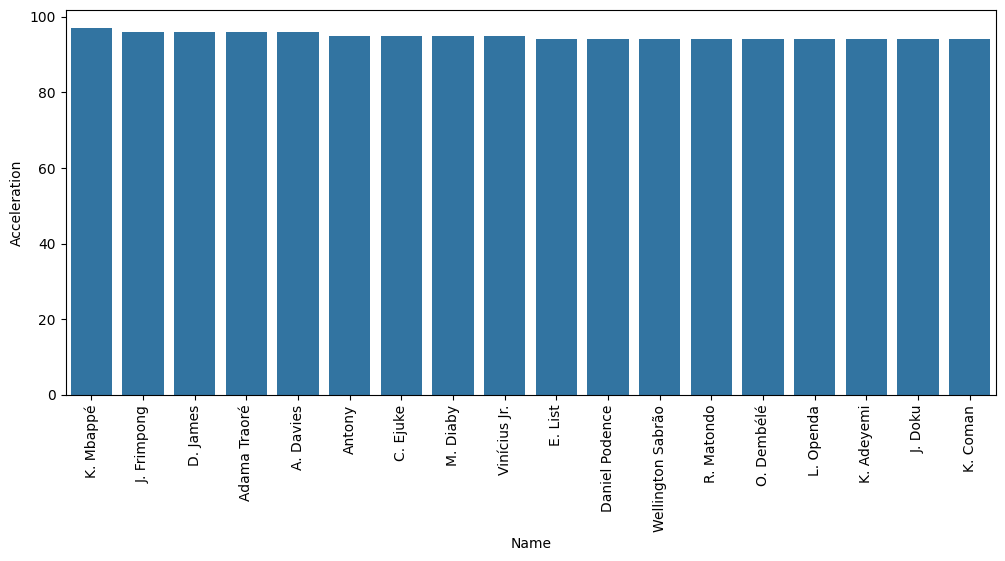

In [ ]:
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.barplot(x = 'Name', y = 'Acceleration', data = top_acc.head(20))

5. Determine if their is a relation between the position of the player and his Wage and Value

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

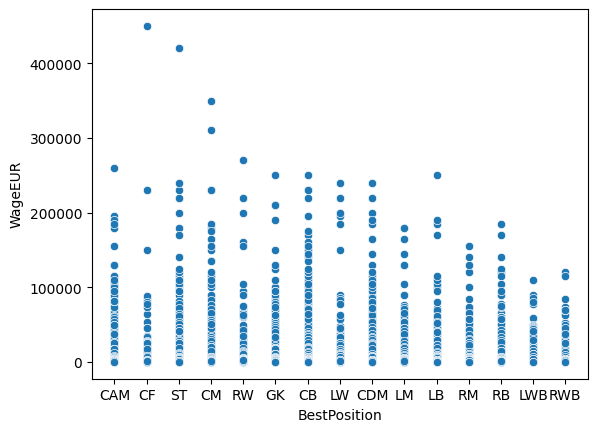

In [ ]:
sns.scatterplot(x = 'BestPosition', y = 'WageEUR', data = data)

Nationality vs Wage

In [ ]:
top_wages= data.sort_values(by = ['WageEUR'], ascending = False)

In [ ]:
top_wages.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
28,182521,T. Kroos,32,183,76,88,88,0,2147,444,...,73,88,71,73,60,10,11,13,7,10
5,209331,M. Salah,30,175,71,90,90,0,2226,471,...,86,92,38,43,41,14,14,9,11,14


Text(0.5, 1.0, 'Nationality wise players wages')

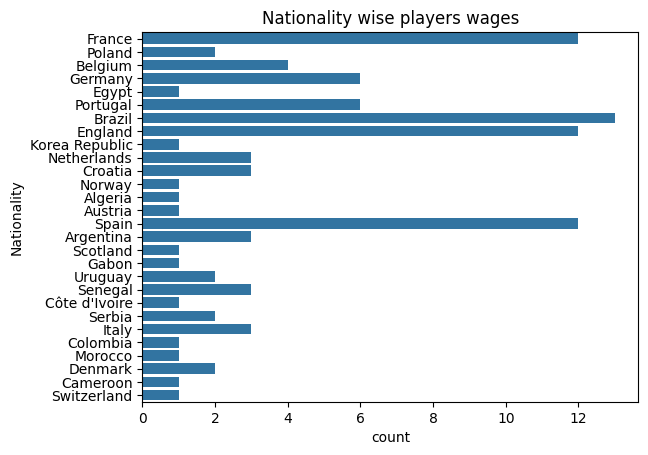

In [ ]:
sns.countplot(y = 'Nationality', data = top_wages.head(100))
plt.title('Nationality wise players wages')

Show the effect of the age on the potential of the players

<Axes: xlabel='Age', ylabel='Potential'>

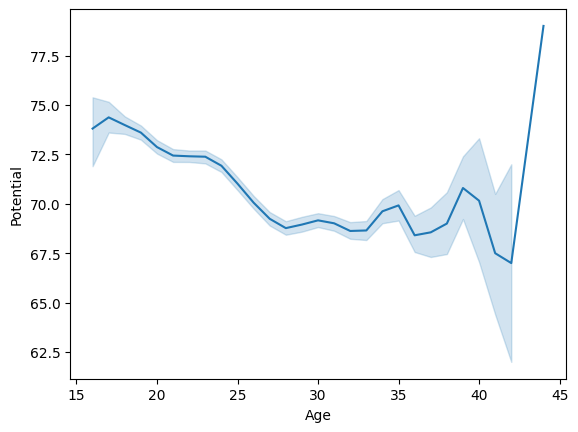

In [ ]:
sns.lineplot(x = 'Age', y = 'Potential', data = data)

View the top 50 players and their clubs

In [ ]:
top_rated  = data.sort_values(by = 'Overall', ascending = False)

<Axes: xlabel='Name', ylabel='Overall'>

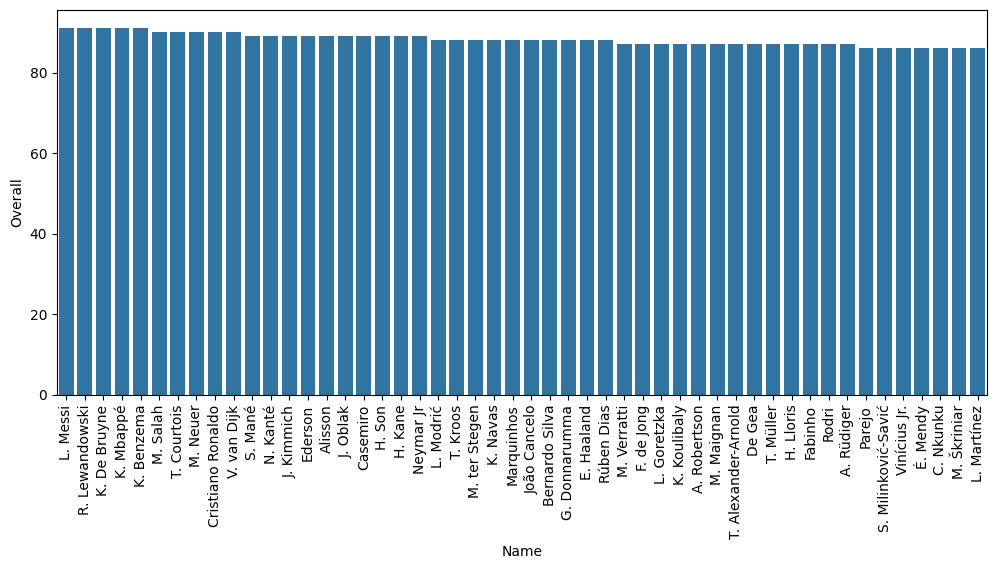

In [ ]:
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.barplot(x = 'Name', y = 'Overall', data = top_rated.head(50))

<Axes: xlabel='Club', ylabel='count'>

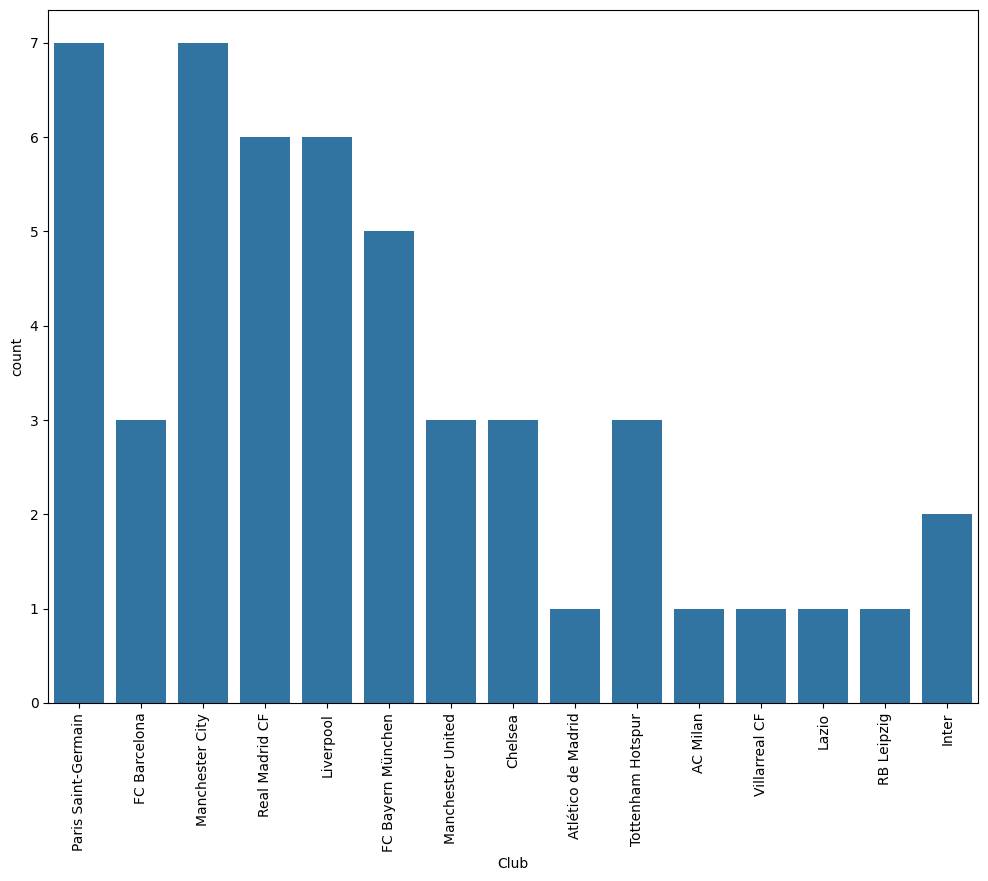

In [ ]:
plt.figure(figsize = (12,9))
plt.xticks(rotation = 90)
sns.countplot(x = 'Club', data = top_rated.head(50))